In [1]:
import scipy.integrate as integrate
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

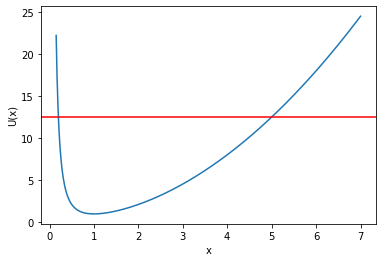

In [2]:
x_v=np.linspace(0.15,7,1000)
w=1
a=1
v0=4
x0=3
m=1
t0=0
e=0.5*m*v0**2+(w**2*x0**2/2 + a**2/(2*x0**2))

v_list=[w**2*x**2/2 + a**2/(2*x**2) for x in x_v]
plt.plot(x_v,v_list)
plt.axhline(e,c='r')
plt.xlabel("x")
plt.ylabel("U(x)")

plt.savefig("U(x),x")

In [3]:

def fun_x(t):
    if (w*a>e):
        raise Exception('D ist nicht kleiner 0')
    k_i=(-(w*x0)**2+e)/np.sqrt(e**2-(w*a)**2)
    k=1/np.abs(w)*np.arcsin(k_i)
    return np.sqrt((e-np.sin(2*abs(w)*(t0+k-t))*np.sqrt(e**2-(w*a)**2))/w**2)

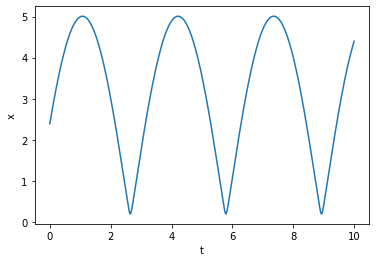

In [4]:
t=np.linspace(t0,t0+10,1000)
x=np.array([fun_x(t) for t in t])

plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("x")

plt.savefig("x,t")

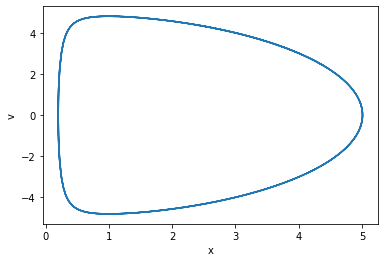

In [5]:
def fun_v(t):
    k_i=(-(w*x0)**2+e)/np.sqrt(e**2-(w*a)**2)
    k=1/np.abs(w)*np.arcsin(k_i)
    return 1/(2*fun_x(t))*(-1*np.sqrt(e**2-(w*a)**2)*np.cos(2*abs(w)*(t0+k-t)))/w**2*(-2*abs(w))

v=np.array([fun_v(t) for t in t])
plt.plot(x,v)
plt.xlabel("x")
plt.ylabel("v")
plt.savefig("v,x")

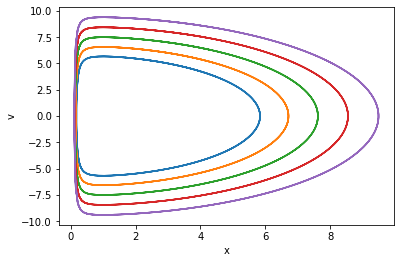

In [6]:
t=np.linspace(t0,t0+10,1000)

for v0 in np.arange(5,10,1):
    e=0.5*m*v0**2+(w**2*x0**2/2 + a**2/(2*x0**2))
    x=np.array([fun_x(t) for t in t])
    v=np.array([fun_v(t) for t in t])
    plt.plot(x,v)
    
plt.xlabel("x")
plt.ylabel("v")
plt.savefig("v,x,5")